# CHM4390A/CHM8309A
## Lecture 3. Working with chemical data

### Lecture objectives
1. Learn how to plot data
2. Learn how to use Rdkit library to work with chemical data

### Required libraries
- NumPy
- Pandas
- Matplotlib
- Rdkit: can be installed via pip

### Pandas

In [ ]:
# Read CSV files as dataframes with pandas
file = os.path.join('data2', 'periodic_table.csv')    # Use sep=';' if necessary, ie if data is separated by ;
df = pd.read_csv(file)

In [ ]:
# Access rows by number (iloc method)
df.iloc[15]

In [ ]:
# Access rows by name/index (loc method)
df.loc[15]                 # NB. here it looks the same as the previous command, but iloc always accesses by numerical
                           # indeces, loc uses what is the defined by the user in the index (first) column (equal
                           # to numerical index by default)

In [ ]:
# Change row name or index

df.set_index('Symbol', inplace=True)

# set_index removes the column. To put it back use .index
df_b = df
df_b['Symbol_back'] = df_b.index
df_b['Symbol_back']

In [ ]:
# Access slices of rows
df.iloc[10:20]

In [ ]:
# Access row, column
df.iloc[10,5]

In [ ]:
# Check columns
df.columns

In [ ]:
# Access column by name
df['AtomicRadius']

# Access different columns
df[['AtomicRadius', 'ElectronAffinity']]

# Access specific values by row and column name
df.loc['N', 'YearDiscovered']            # loc is much more convenient than iloc as the latter needs to know the exact numerical position

In [ ]:
# Since pandas is based on numpy, you can add or multiply vectors to data easily
df['MeltingPoint'] - 273.15                              # Melting point in C degrees
df['MeltingPoint_C'] = df['MeltingPoint'] - 273.15       # To save into a new column

In [ ]:
# Can apply functions too, using apply (or you can do that like you would do to a normal array)
def c_to_f(t):
    t_f = t*1.8 + 32
    return t_f
    
df['MeltingPoint_F'] = df['MeltingPoint_C'].apply(c_to_f)

In [ ]:
# Data filtering with query
df.query('MeltingPoint > 300 and ElectronAffinity > 1')                     # Can use AND and OR statements for numerical data

In [ ]:
# Can compare columns
df.query('MeltingPoint > AtomicRadius')  

In [ ]:
# Can combine filtering with other things
df.query('MeltingPoint > AtomicRadius')[['MeltingPoint', 'AtomicRadius']]

In [ ]:
# Data sorting with sort_values
df.sort_values(by='MeltingPoint')      # axis = 0 if not specified

In [43]:
# Grouping data with groupby
df_grp = df.groupby(by='StandardState')
df_grp.groups                                  # Dictionary with groups that have been created, where values are the indexes

{'Expected to be a Gas': ['Og'], 'Expected to be a Solid': ['Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts'], 'Gas': ['H', 'He', 'N', 'O', 'F', 'Ne', 'Cl', 'Ar', 'Kr', 'Xe', 'Rn'], 'Liquid': ['Br', 'Hg'], 'Solid': ['Li', 'Be', 'B', 'C', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt']}

In [ ]:
# Save dataframe to CSV files
df.to_csv('periodic_table_new.csv', sep=' ', index=True)  

### Plotting data

In [1]:
import os
import pandas as pd

In [2]:
# Let's plot the distances between aminoacids and molecules in a system during a molecular dynamics simulations, 
# from a tabular file
aa_d = os.path.join('data3', 'distances_aa.csv')
aa_df = pd.read_csv(aa_d)
aa_df.head()

,Frame,THR4_ATP,THR4_ASP,TYR6_ATP,TYR6_ASP
0,1,8.9542,5.8024,11.5478,9.9557
1,2,8.6181,6.0942,13.9594,11.6945
2,3,9.0066,6.0637,13.0924,11.3043
3,4,9.2002,6.0227,14.5282,10.1763
4,5,9.1294,5.9365,13.5321,10.6279


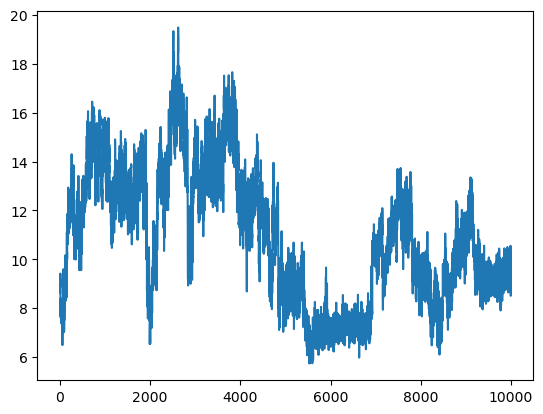

In [3]:
# Data can be plotted with the pyplot module from the matplotlib library
import matplotlib.pyplot as plt                          # Import a module from a library

plt.plot(aa_df['Frame'], aa_df['THR4_ATP'])              # plot(x,y)

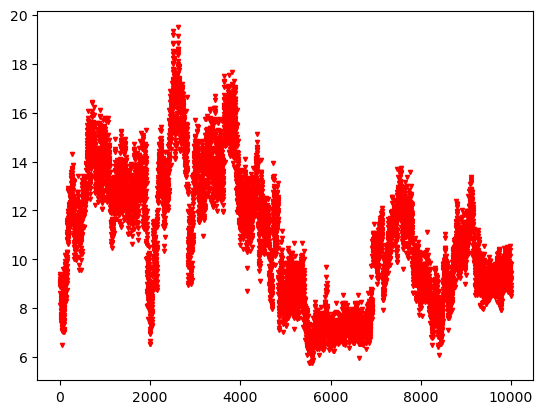

In [4]:
# Customize plots (markers, colors, styles...)
plt.figure()
plt.plot(aa_df['THR4_ATP'], color='r', marker='v', linestyle='None', markersize = 3.0)

#plt.savefig('fig1.png', dpi=300)

In [5]:
# Make a better plot
# Check the headers
columns = aa_df.columns
print(columns)

Index(['Frame', 'THR4_ATP', 'THR4_ASP', 'TYR6_ATP', 'TYR6_ASP'], dtype='object')


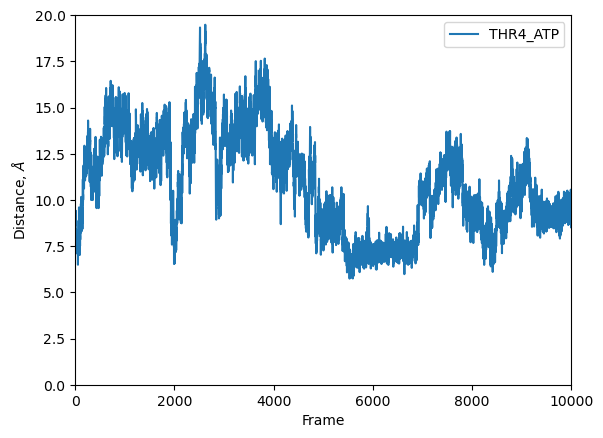

In [6]:
# Further improve a plot and save as a figure
plt.figure()
plt.xlabel('Frame')
plt.ylabel('Distance, $\AA$')                                    # Distance in angstrom
plt.xlim(0, aa_df['Frame'].iloc[-1])                             # xlim given by the last frame
plt.ylim(0, 20)                                                  # ylim assigned to a number                             # ylim given by the max value of the distance
plt.plot(aa_df['Frame'], aa_df['THR4_ATP'], label=columns[1])    # Use column name as label in the legend   
plt.legend()

plt.savefig('fig1.png', dpi=300)

In [7]:
# Plot multiple data series
plt.figure()                  
for col in labels[1:]:                 # Exclude frames
    plt.plot(aa_df['Frame'], aa_df[col], label=col)    

plt.xlabel('Frame')
plt.ylabel('Distance, $\AA$')
plt.xlim(0, aa_df['Frame'].iloc[-1])
plt.ylim(0,20)            # ylim given by the max value of the distance
plt.legend()

plt.savefig('fig2.png', dpi=300)

NameError: name 'labels' is not defined

<Figure size 640x480 with 0 Axes>

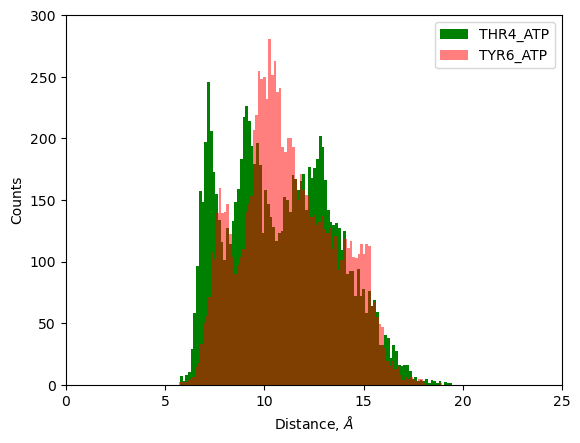

In [8]:
# Plotting histograms
plt.figure() 

nbins = int((len(aa_df)**0.5))        # Square root of the sample size as number of bins

plt.hist(aa_df['THR4_ATP'], bins=nbins, label='THR4_ATP', color='g')
plt.hist(aa_df['TYR6_ATP'], bins=nbins, label='TYR6_ATP', color='r', alpha=0.5)     # Alpha for transparency

plt.xlabel('Distance, $\AA$')
plt.ylabel('Counts')
plt.xlim(0, 25)
plt.ylim(0, 300)
plt.legend()

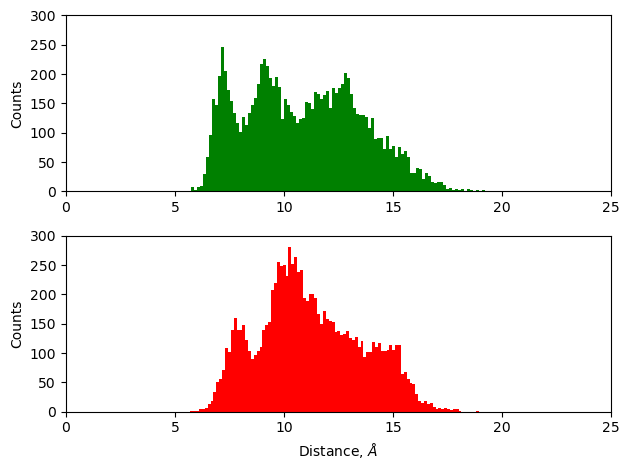

In [9]:
# Plotting subplots
fig, ax = plt.subplots(2, 1)        # (nrows, ncols)

ax[0].hist(aa_df['THR4_ATP'], bins=nbins, label='THR4_ATP', color='g')            # ax[i] defines where to place it
ax[1].hist(aa_df['TYR6_ATP'], bins=nbins, label='TYR6_ATP', color='r')
#plt.xlabel('Distance, $\AA$')
#plt.ylabel('Counts')
ax[0].set_xlim(0, 25)
ax[0].set_ylim(0, 300)
ax[1].set_xlim(0, 25)
ax[1].set_ylim(0, 300) 
ax[1].set_xlabel('Distance, $\AA$')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
fig.tight_layout()

### Rdkit basics

In [10]:
from rdkit import Chem
import pandas as pd
import os

file = os.path.join('data3', 'zinc_subset.smi')        # 145 compounds from ZINC with logP>5 and MW up to 250 Da

In [11]:
df = pd.read_csv(file, sep=' ')                        # Separator is a whitespace in smiles files
df.head()

,smiles,zinc_id
0,c1ccc(Nc2ccc(-c3ccccc3)cc2)cc1,39392021
1,CC1=CCCC(C)=CCCC(C)=CCC1,2571326
2,CCCCCc1ccc(-c2ccc(C)cc2)cc1,59796871
3,CC(C)c1ccc2ccc(C(C)C)cc2c1,2567291
4,CCCCC[C@H]1CC[C@H](c2ccc(F)cc2)CC1,245189327


In [13]:
# Read single molecules
smi = df.loc[0, 'smiles']
m = Chem.MolFromSmiles(smi)                 # Create a molecule object in rdkit

In [14]:
# Read multiple molecules and add/extract some properties from mol object
smi_list = [x for x in df.iloc[0:3]['smiles']]
names = [str(k) for k in df.iloc[0:3]['zinc_id']]        # Properties to rdkit mol objects must be strings

for i in range(len(smi_list)):
    mol = Chem.MolFromSmiles(smi_list[i])
    n_atoms = mol.GetNumAtoms()              # Get properties
    mol.SetProp("_Name", names[i])           # Set new properties
    name = mol.GetProp("_Name")              # Get the new property
    print(smi_list[i], name, n_atoms)

c1ccc(Nc2ccc(-c3ccccc3)cc2)cc1 39392021 19
CC1=CCCC(C)=CCCC(C)=CCC1 2571326 15
CCCCCc1ccc(-c2ccc(C)cc2)cc1 59796871 18


In [15]:
# Can do with dictionaries too. Usually better than lists because:
# 1. does not need to know the order (we access via keys, an analogy with accessing pandas columns by names)
# 2. Faster than lists

dc = {}

for key in names:
    for value in smi_list:
        dc[key] = value
        smi_list.remove(value)
        break
dc      

{'39392021': 'c1ccc(Nc2ccc(-c3ccccc3)cc2)cc1',
 '2571326': 'CC1=CCCC(C)=CCCC(C)=CCC1',
 '59796871': 'CCCCCc1ccc(-c2ccc(C)cc2)cc1'}

In [16]:
for keys in dc:
    mol = Chem.MolFromSmiles(dc[keys])
    n_atoms = mol.GetNumAtoms()              # Get properties
    mol.SetProp("_Name", keys)               # Set new properties
    name = mol.GetProp("_Name")              # Get the new property
    print(dc[keys], name, n_atoms)

c1ccc(Nc2ccc(-c3ccccc3)cc2)cc1 39392021 19
CC1=CCCC(C)=CCCC(C)=CCC1 2571326 15
CCCCCc1ccc(-c2ccc(C)cc2)cc1 59796871 18


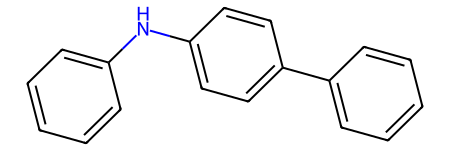

In [17]:
# Draw molecules
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

mol = Chem.MolFromSmiles(dc['39392021'])
Draw.MolToFile(mol, 'mol.png')
mol

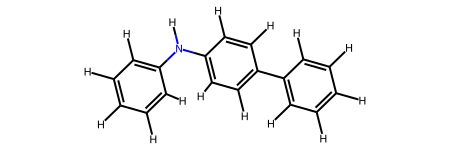

In [18]:
# Can also modify molecules
m2 = Chem.AddHs(mol)
m2

In [60]:
# And loop over atoms and bonds

for atom in m2.GetAtoms():
    nc = atom.GetAtomicNum() 
    s = atom.GetSymbol()
    print(s, nc)

C 6
C 6
C 6
C 6
N 7
C 6
C 6
C 6
C 6
C 6
C 6
C 6
C 6
C 6
C 6
C 6
C 6
C 6
C 6
H 1
H 1
H 1
H 1
H 1
H 1
H 1
H 1
H 1
H 1
H 1
H 1
H 1
H 1
H 1


In [61]:
# Read a molecular file as list of mols using Suppliers
suppl = Chem.SmilesMolSupplier(file)

for mol in suppl:
    print(Chem.MolToSmiles(mol), mol.GetNumAtoms(), mol.GetProp("_Name"))     # Can also go from rdkit mol to other formats

c1ccc(Nc2ccc(-c3ccccc3)cc2)cc1 19 39392021
CC1=CCCC(C)=CCCC(C)=CCC1 15 2571326
CCCCCc1ccc(-c2ccc(C)cc2)cc1 18 59796871
CC(C)c1ccc2ccc(C(C)C)cc2c1 16 2567291
CCCCC[C@H]1CC[C@H](c2ccc(F)cc2)CC1 18 245189327
c1ccc(Nc2cccc(-c3ccccc3)c2)cc1 19 44069168
CCc1c(CC)c(CC)c(CC)c(CC)c1CC 18 1672860
Cc1cc(C2CCC(C)(C)CC2)ccc1Cl 16 1857775568
C(=C/c1ccc2ccccc2c1)\c1ccccc1 18 2066580
CCC[C@H]1CC[C@H](c2ccc(OCC)cc2)CC1 18 245189303
CC1=CCCC=C(C)CCC(C)=CCC1 15 2169439
CC(C)=C1[C@H]2C=C[C@H]1c1c(C)c(C)c(C)c(C)c12 18 101010155
C=CCC1(CC=C)c2ccccc2-c2ccccc21 19 113091113
Clc1ccc(/C=C/C=C/c2ccccc2)cc1 17 2023321
Cc1ccc(/C=C/C=C/c2ccc(C)cc2)cc1 18 3075469
CCCC/C=C/CCCCCCCCCCO 17 5509933
CC[C@@H](C)CCCCCCCCCCC(=O)O 17 2037243
Cc1ccc(/C=C\c2ccccc2)c2ccccc12 19 96834867
CC(C)(C)CP(C(C)(C)C)C(C)(C)C 14 60290815
C1=C\CC/C=C\[C@H]([C@@H]2/C=C\C=C/CC/C=C\2)\C=C/1 18 101036866
CCCCC[C@H]1CC[C@H](c2ccc(O)cc2)CC1 18 242648303
c1ccc(-c2cccc(-c3ccccc3)c2)cc1 18 1866998
Clc1ccccc1/C=C/c1ccccc1Cl 16 1665673
C(=Cc1cccc2ccc

In [62]:
# Can also combine with pandas with PandasTools
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(df,'smiles','rdkit_mol')       # Add a column with molecule objects in it
df.head()

,smiles,zinc_id,rdkit_mol
0,c1ccc(Nc2ccc(-c3ccccc3)cc2)cc1,39392021,<rdkit.Chem.rdchem.Mol object at 0x133aebac0>
1,CC1=CCCC(C)=CCCC(C)=CCC1,2571326,<rdkit.Chem.rdchem.Mol object at 0x133aeb740>
2,CCCCCc1ccc(-c2ccc(C)cc2)cc1,59796871,<rdkit.Chem.rdchem.Mol object at 0x135861900>
3,CC(C)c1ccc2ccc(C(C)C)cc2c1,2567291,<rdkit.Chem.rdchem.Mol object at 0x1358619e0>
4,CCCCC[C@H]1CC[C@H](c2ccc(F)cc2)CC1,245189327,<rdkit.Chem.rdchem.Mol object at 0x135861970>
